In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline
%run categories.py
%run lib.py

# Overwrite constants to match fake transactions years
last_year = '2011'
this_year = '2012'

In [2]:
# Load transaction history
tra = pd.read_csv('faketransactions.csv', index_col=[0])
tra.columns = [i.strip() for i in tra.columns]
tra.replace(np.nan, 0, inplace=True)

# Calculate running balance
tra = calc_balance(tra)

In [3]:
x = 10
# Display last x transactions
if True: display(tra.loc[tra.shape[0]-x:,['Date', 'Source', 'Item', 'Transaction', 'Balance']])

,Date,Source,Item,Transaction,Balance
105,29-11-2012,Mom,Repay,445.00,4287.13
106,03-12-2012,Cineplex,Movie Tickets,-54.95,4232.18
107,05-12-2012,Compassion Canada,Child Sponsorship,-41.00,4191.18
108,05-12-2012,Work,"Website Maintenance, Tutoring",385.00,4576.18
109,05-12-2012,Me,Cash,-100.00,4476.18
110,20-12-2012,Fairview,Christmas Gifts,-72.99,4403.19
111,23-12-2012,Cosmo Music,"Guitar Picks, Car Freshener",-14.33,4388.86
112,28-12-2012,Shops at Don Mills,Christmas Gifts,-101.13,4287.73
113,29-12-2012,PizzaPizza,Dinner,-22.58,4265.15
114,31-12-2012,Cineplex,Movie Tickets,-74.95,4190.20


In [4]:
# Add transactions
tra = add_tra(tra, '02-01-2013', 'Tim Hortons', 'Breakfast', -5.24)
tra = add_tra(tra, '05-01-2013', 'Compassion Canada', 'Child Sponsorship', -41)

In [5]:
# Save transaction history
#tra.to_csv('transactions.csv')
#tra.to_csv('faketransactions.csv')

In [6]:
# Categorize entries based on source
tra['Category'] = tra['Source'].map(categorize)

# Refine categorizations based on item description
for i in range(tra.shape[0]):
    for key in items.keys():
        if key.lower() in str(tra['Item'][i]).lower():
            tra.at[i,'Category'] = items[key];
            
# TODO: Figure out how to divide up and categorize credit card payments!

# Create separate dataframes for this year and last year
tytra = tra[tra['Date'].apply(lambda x : year(x) == this_year)]
lytra = tra[tra['Date'].apply(lambda x : year(x) == last_year)]

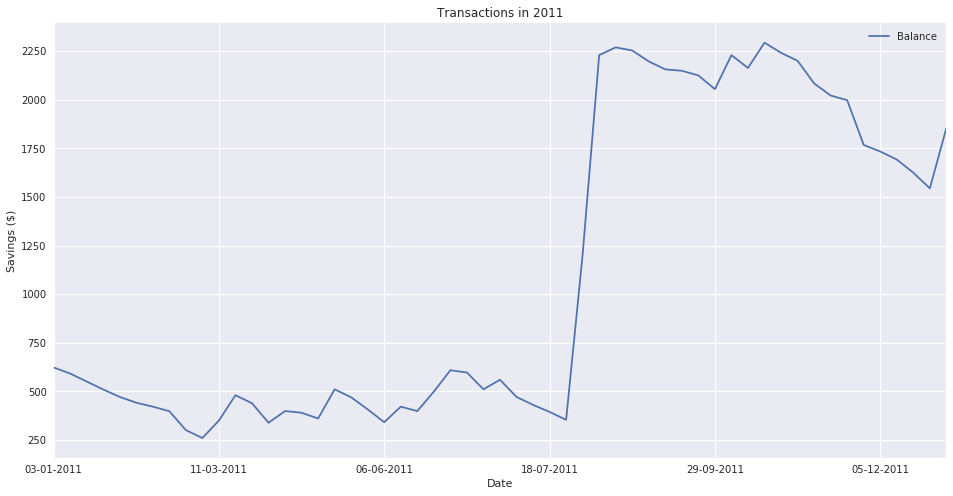

In [7]:
if True: graph_trans(lytra, last_year);

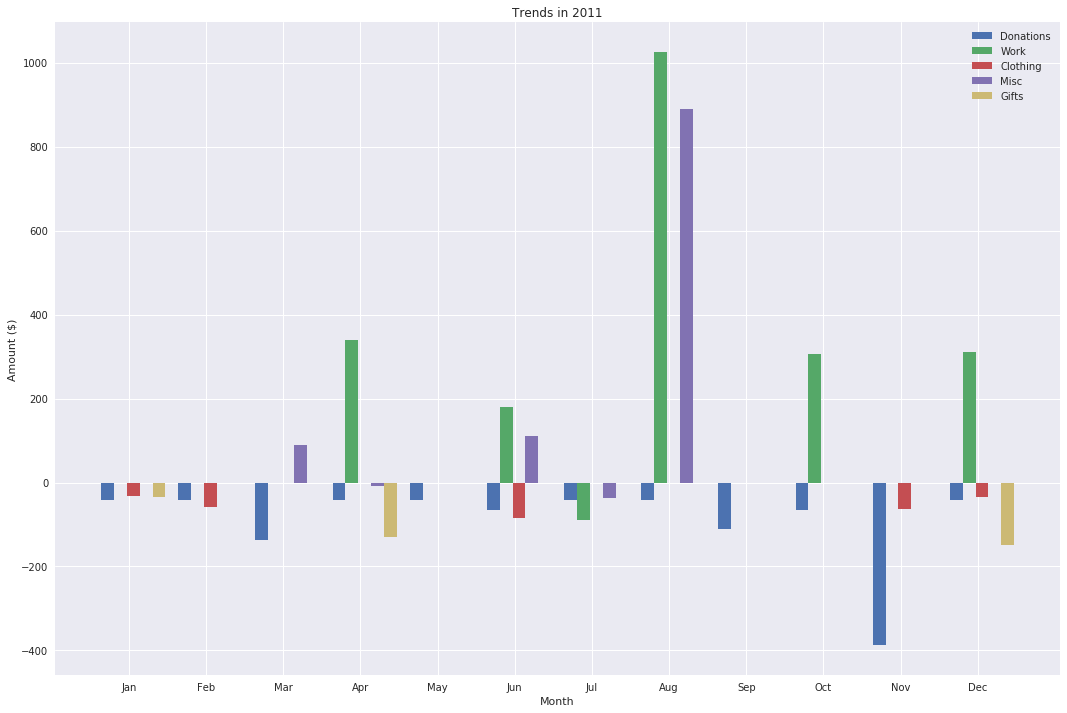

In [8]:
# See the monthly balance for the top x categories (based on frequency, not amount, of transactions)
if True: graph_trend(lytra, last_year, 5);

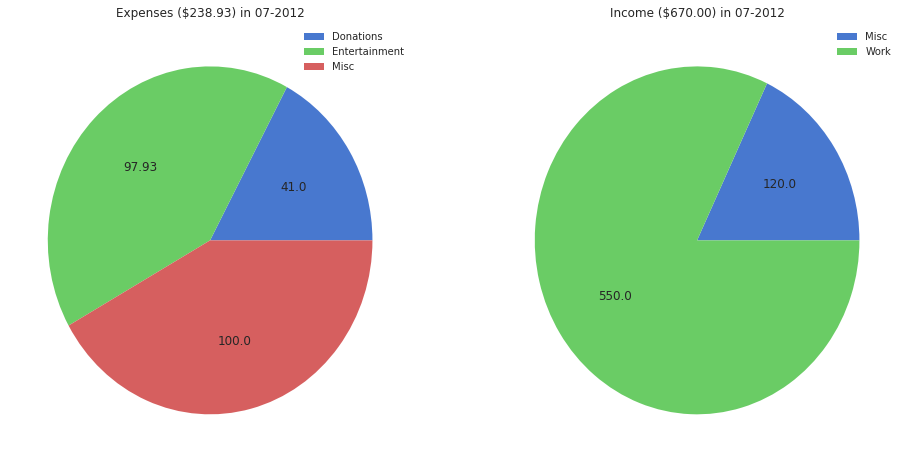

In [9]:
# See the categorical distribution of expenses and income for the month
if True: graph_month(tra, '07', this_year);

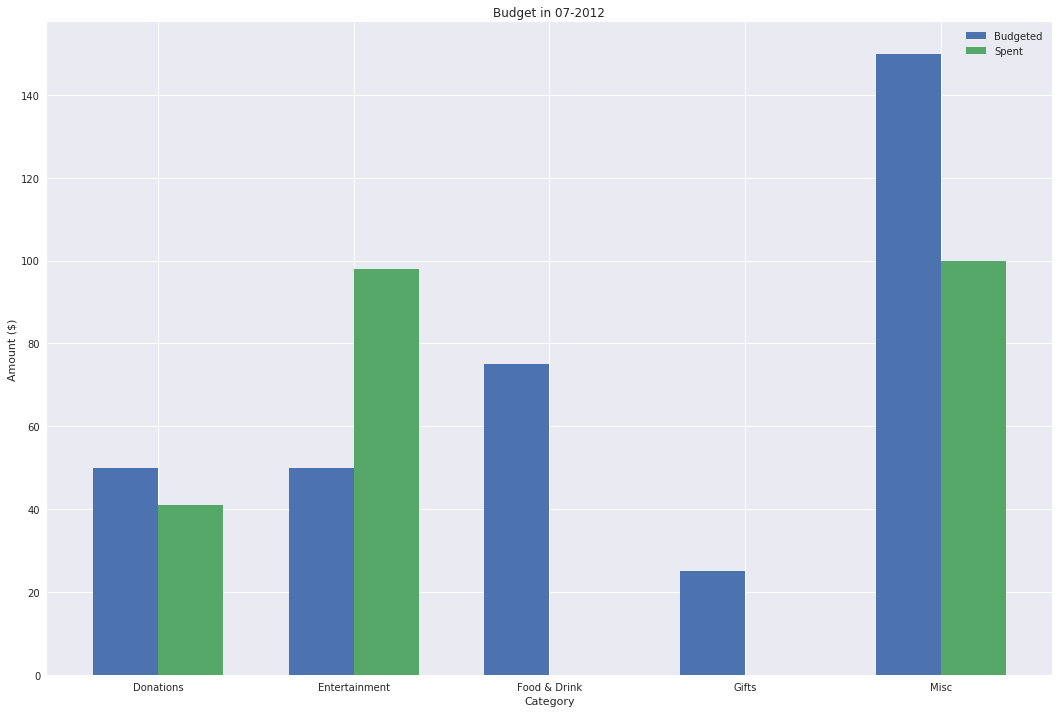

In [10]:
# Create budget for as many categories as desired. Needs to be in alphabetical order!
budget = {'Donations': 50,
          'Entertainment': 50,
          'Food & Drink': 75,
          'Gifts': 25,
          'Misc': 150}

# Compare actual to budgeted expenses for the month
if True: graph_budget(tra, budget, '07', this_year);

In [11]:
# TODO: Use machine learning to learn spending behaviour?